In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv(r"C:\Users\Ashutosh Thakur\Desktop\ML tuts\Dataset\titanic-train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
# Checking for duplicates
np.unique(df.duplicated())

array([False])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [104]:
# Check the total number of Unique Values in the Categorical Columns
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [105]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [106]:
df.drop(['Ticket','Name'],axis = 1, inplace = True)

In [107]:
df.shape

(891, 10)

In [108]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [109]:
df.drop("Cabin",axis = 1, inplace = True)
df.dropna(subset = ["Embarked"], axis = 0, inplace = True)

In [110]:
df.shape

(889, 9)

In [111]:
df = df.fillna(np.mean(df['Age']))

In [112]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

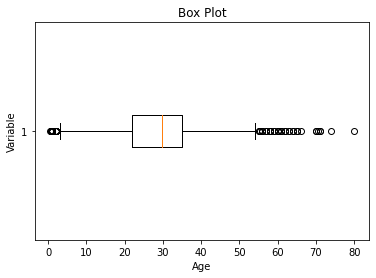

In [113]:
plt.boxplot(df["Age"],vert = False)
plt.xlabel("Age")
plt.ylabel("Variable")
plt.title("Box Plot")
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [115]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [116]:
df['Sex'] = df['Sex'].replace(['male','female'],[1,0])

In [117]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [118]:
df['Embarked']=df['Embarked'].replace(['S','C','Q'],[0,1,2])

In [122]:
df_clean = df.copy()
for col in df.columns:
    q1,q3 = np.percentile(df_clean[col],[25,75])
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df_clean = df_clean[(df_clean[col]>=lower_bound) & (df_clean[col]<=upper_bound)]

In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 887
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  421 non-null    int64  
 1   Survived     421 non-null    int64  
 2   Pclass       421 non-null    int64  
 3   Sex          421 non-null    int64  
 4   Age          421 non-null    float64
 5   SibSp        421 non-null    int64  
 6   Parch        421 non-null    int64  
 7   Fare         421 non-null    float64
 8   Embarked     421 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 32.9 KB


In [124]:
X = df_clean.drop(['PassengerId','Survived'],axis = 1)
y = df_clean['Survived']

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
X_scaled

array([[1.        , 1.        , 0.34693878, ..., 0.        , 0.13653484,
        0.        ],
       [1.        , 0.        , 0.42857143, ..., 0.        , 0.1492467 ,
        0.        ],
       [0.        , 0.        , 0.6122449 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.40816327, ..., 0.        , 0.13276836,
        0.        ],
       [0.5       , 1.        , 0.44897959, ..., 0.        , 0.24482109,
        0.        ],
       [0.        , 0.        , 0.28571429, ..., 0.        , 0.56497175,
        0.        ]])